(-644.0625, 16124.0625, 3810.9375, 20579.0625, -1565.0625, 15203.0625)

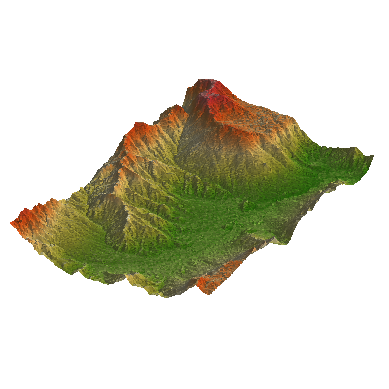

In [218]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import LightSource

def set_axes_equal(ax, scaling=0.6):
    """Make axes of 3D plot have equal scale.

    Make axes of 3D plot have equal scale so that spheres
    appear as spheres,     cubes as cubes, etc..  This is one
    possible solution to Matplotlib's ax.set_aspect('equal')
    and ax.axis('equal') not working for 3D.
    
    Taken from: https://stackoverflow.com/a/31364297/3358223

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    """
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = scaling * 0.5 * max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

pts = np.loadtxt("files/valle_aburra-quads.pts", skiprows=2)
x, y, z = pts.T
x.shape = 272, 173
y.shape = 272, 173
z.shape = 272, 173
#y = y[::-1, :]

# Derivadas
dx = x[0, 1]  - x[0, 0]
dzdx, dzdy = np.gradient(z, dx)
grad_mag = np.sqrt(dzdx**2 + dzdy**2)

angulo = np.arctan(grad_mag) * 180/np.pi


#%% Visualización
colores = ["#63b82a", "#d1d26a", "#ffe8a5", "#fb9549", "#ef7272"]
norm = plt.Normalize(0, 90)
cmap = LinearSegmentedColormap.from_list("", colores)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ls = LightSource(270, 45)
rgb = ls.shade(3*z, cmap=cmap, vert_exag=0.1, blend_mode="soft")
surf = ax.plot_surface(x, y, 3*z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=True)
set_axes_equal(ax)
ax.axis("off")

In [219]:


# Función para convertir coordenadas DMS a grados decimales
def dms_to_dd(degrees, minutes, seconds):
    return degrees + minutes / 60 + seconds / 3600

def lat_lon_to_meters(lat1, lon1, lat2, lon2):
    lat_diff = (lat2 - lat1) * 111320  # Diferencia de latitud en metros
    lon_diff = (lon2 - lon1) * 111320 * np.cos(np.radians((lat1 + lat2) / 2))  # Diferencia de longitud en metros
    return lat_diff, lon_diff


# Coordenadas en DMS convertidas a grados decimales
# Cerro Nutibara: 6°14'08.1"N, 75°34'46.9"W
lat_nutibara = dms_to_dd(6, 14, 8.1)
lon_nutibara = dms_to_dd(75, 34, 46.9)

# Universidad EAFIT: 6°11'58.5"N, 75°34'45.4"W
lat_eafit = dms_to_dd(6, 11, 58.5)
lon_eafit = dms_to_dd(75, 34, 45.4)

# Casa: 6°19'41.3"N, 75°34'04.8"W
lat_casa = dms_to_dd(6, 19, 41.3)
lon_casa = dms_to_dd(75, 34, 4.8)

# Calcular las distancias en metros
dy_nutibara_eafit, dx_nutibara_eafit = lat_lon_to_meters(lat_nutibara, lon_nutibara, lat_eafit, lon_eafit)
dy_nutibara_casa, dx_nutibara_casa = lat_lon_to_meters(lat_nutibara, lon_nutibara, lat_casa, lon_casa)
dy_eafit_casa, dx_eafit_casa = lat_lon_to_meters(lat_eafit, lon_eafit, lat_casa, lon_casa)

# Mostrar los resultados
x_nutibara, y_nutibara = 10_490, 11_100
x_eafit, y_eafit = x_nutibara + dx_nutibara_eafit, y_nutibara + dy_nutibara_eafit
x_casa, y_casa = x_nutibara + dx_nutibara_casa, y_nutibara + dy_nutibara_casa

#indices
index_nutibara_x, index_nutibara_y = np.unravel_index((np.abs(x - x_nutibara) + np.abs(y - y_nutibara)).argmin(), x.shape)
index_eafit_x, index_eafit_y = np.unravel_index((np.abs(x - x_eafit) + np.abs(y - y_eafit)).argmin(), x.shape)
index_casa_x, index_casa_y = np.unravel_index((np.abs(x - x_casa) + np.abs(y - y_casa)).argmin(), x.shape)

# Ángulos de los puntos
angulo_nutibara = angulo[index_nutibara_x, index_nutibara_y]
angulo_eafit = angulo[index_eafit_x, index_eafit_y]
angulo_casa = angulo[index_casa_x, index_casa_y]


# Elevaciones de los puntos en los índices correspondientes
elevacion_nutibara = z[index_nutibara_x, index_nutibara_y]
elevacion_eafit = z[index_eafit_x, index_eafit_y]
elevacion_casa = z[index_casa_x, index_casa_y]

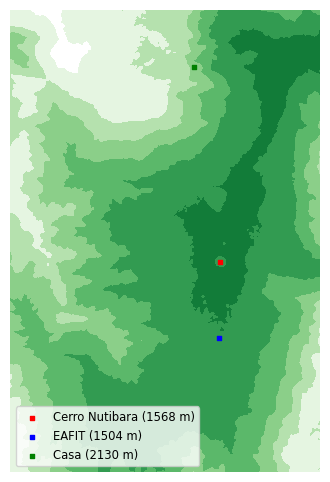

In [220]:
levels = [0, 5, 15, 30, 45]

# Graficar el mapa de elevación y los puntos
fig = plt.figure(figsize=(4, 6))  
levels = [1000, 1250, 1500, 1750, 2000, 2250, 2500, 3000]
plt.contourf(x, y, z, levels=levels, cmap='Greens_r', extent=(np.min(x), np.max(x), np.min(y), np.max(y)), origin='lower')

# Marcar los puntos
plt.scatter(x_nutibara, y_nutibara, marker='s', color="red", s=5, label=f'Cerro Nutibara ({elevacion_nutibara:.0f} m)')
plt.scatter(x_eafit, y_eafit, marker='s', color="blue", s=5, label=f'EAFIT ({elevacion_eafit:.0f} m)')
plt.scatter(x_casa, y_casa, marker='s', color="green", s=5, label=f'Casa ({elevacion_casa:.0f} m)')

plt.legend(fontsize='small')
plt.axis("off")
plt.show()

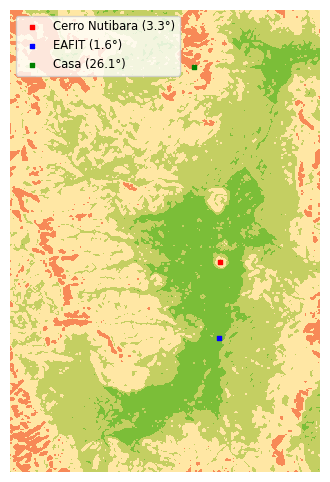

In [221]:
levels = [0, 5, 15, 30, 45]
fig = plt.figure(figsize=(4, 6))  
plt.contourf(x, y, angulo, levels=levels, cmap=cmap, extent=(np.min(x), np.max(x), np.min(y), np.max(y)), origin='lower')
plt.scatter(x_nutibara, y_nutibara, marker='s', color="red", s=5, label=f'Cerro Nutibara ({angulo_nutibara:.1f}°)')
plt.scatter(x_eafit, y_eafit, marker='s', color="blue", s=5, label=f'EAFIT ({angulo_eafit:.1f}°)')
plt.scatter(x_casa, y_casa, marker='s', color="green", s=5, label=f'Casa ({angulo_casa:.1f}°)')
plt.legend(fontsize='small')
plt.axis("off")
plt.show()
